# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [3]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_StumbleGuys_1.csv")
df.head()

,userName,score,at,content
0,Widayanti Azra,5,2024-06-03 06:16:49,Game ini sangat bagus
1,Hermawan Putri,3,2024-06-03 06:14:07,Balikin stumble yg dulu
2,Andi Suherman,1,2024-06-03 06:09:32,Mendingan kitka games dari pada scopely
3,Celsi Syalifah,5,2024-06-03 06:05:19,sangat baguss tpi kalo bisa tambahkan denger s...
4,Bayu Dara,1,2024-06-03 05:58:23,Gem kok adaa iklan nyaa.udaa gituu ngfrem nyaa...


In [4]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Game ini sangat bagus,Widayanti Azra,2024-06-03 06:16:49
1,Balikin stumble yg dulu,Hermawan Putri,2024-06-03 06:14:07
2,Mendingan kitka games dari pada scopely,Andi Suherman,2024-06-03 06:09:32
3,sangat baguss tpi kalo bisa tambahkan denger s...,Celsi Syalifah,2024-06-03 06:05:19
4,Gem kok adaa iklan nyaa.udaa gituu ngfrem nyaa...,Bayu Dara,2024-06-03 05:58:23
...,...,...,...
393,"Makin di update makin berat, untuk pengguna an...",Sahrul Gufron,2024-06-01 15:50:31
394,update muluu cape,Bilbina S,2024-06-01 15:47:46
395,Lumayan,Excel Alamuddin,2024-06-01 15:40:35
396,Loding nya lama😠,Eva Sari,2024-06-01 15:35:09


In [5]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   398 non-null    object
 1   userName  398 non-null    object
 2   at        398 non-null    object
dtypes: object(3)
memory usage: 9.5+ KB


In [6]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,398,398,398
unique,387,398,395
top,Bagus,Widayanti Azra,2024-06-02 03:21:26
freq,6,1,2


# **Cleaning Data**

In [7]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(398, 3)

In [8]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [9]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [10]:
# Menghapus data yang kosong
df = df.dropna()

In [11]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [12]:
df.shape

(387, 3)

In [13]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [14]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,game ini sangat bagus,Widayanti Azra,2024-06-03 06:16:49
1,balikin stumble yg dulu,Hermawan Putri,2024-06-03 06:14:07
2,mendingan kitka games dari pada scopely,Andi Suherman,2024-06-03 06:09:32
3,sangat baguss tpi kalo bisa tambahkan denger s...,Celsi Syalifah,2024-06-03 06:05:19
4,gem kok adaa iklan nyaaudaa gituu ngfrem nyaa ...,Bayu Dara,2024-06-03 05:58:23
...,...,...,...
392,game nya lama seru min,Hesel Arve,2024-06-01 15:56:31
393,makin di update makin berat untuk pengguna and...,Sahrul Gufron,2024-06-01 15:50:31
394,update muluu cape,Bilbina S,2024-06-01 15:47:46
396,loding nya lama,Eva Sari,2024-06-01 15:35:09


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [16]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,game ini sangat bagus,Widayanti Azra,2024-06-03 06:16:49
1,balikin stumble yang dulu,Hermawan Putri,2024-06-03 06:14:07
2,mendingan kitka games dari pada scopely,Andi Suherman,2024-06-03 06:09:32
3,sangat baguss tpi kalo bisa tambahkan denger s...,Celsi Syalifah,2024-06-03 06:05:19
4,gem kenapa adaa iklan nyaaudaa gituu ngfrem ny...,Bayu Dara,2024-06-03 05:58:23
...,...,...,...
392,game nya lama seru min,Hesel Arve,2024-06-01 15:56:31
393,makin di update makin berat untuk pengguna and...,Sahrul Gufron,2024-06-01 15:50:31
394,update muluu cape,Bilbina S,2024-06-01 15:47:46
396,loding nya lama,Eva Sari,2024-06-01 15:35:09


In [17]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.6 MB/s eta 0:00:00


In [18]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,game sangat bagus,Widayanti Azra,2024-06-03 06:16:49
1,balikin stumble dulu,Hermawan Putri,2024-06-03 06:14:07
2,mendingan kitka games pada scopely,Andi Suherman,2024-06-03 06:09:32
3,sangat baguss tpi kalo tambahkan denger suara ...,Celsi Syalifah,2024-06-03 06:05:19
4,gem adaa iklan nyaaudaa gituu ngfrem nyaa mele...,Bayu Dara,2024-06-03 05:58:23
...,...,...,...
392,game nya lama seru min,Hesel Arve,2024-06-01 15:56:31
393,makin update makin berat pengguna android hany...,Sahrul Gufron,2024-06-01 15:50:31
394,update muluu cape,Bilbina S,2024-06-01 15:47:46
396,loding nya lama,Eva Sari,2024-06-01 15:35:09


In [19]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                  [game, sangat, bagus]
1                               [balikin, stumble, dulu]
2               [mendingan, kitka, games, pada, scopely]
3      [sangat, baguss, tpi, kalo, tambahkan, denger,...
4      [gem, adaa, iklan, nyaaudaa, gituu, ngfrem, ny...
                             ...                        
392                         [game, nya, lama, seru, min]
393    [makin, update, makin, berat, pengguna, androi...
394                                [update, muluu, cape]
396                                  [loding, nya, lama]
397          [dev, keluarkan, luffy, biasa, luffy, gear]
Name: content, Length: 387, dtype: object

In [20]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_StumbleGuys_1.csv', index = False)


In [21]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_StumbleGuys_1.csv', encoding = 'latin1')
df_clean

,content
0,game sangat bagus
1,balikin stumble dulu
2,mending kitka games pada scopely
3,sangat baguss tpi kalo tambah denger suara sat...
4,gem adaa iklan nyaaudaa gituu ngfrem nyaa mele...
...,...
382,game nya lama seru min
383,makin update makin berat guna android hanya ra...
384,update muluu cape
385,loding nya lama


# **Translate**

In [22]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [23]:
# import pandas as pd
# from easynmt import EasyNMT

In [24]:
# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_StumbleGuys_1.csv', encoding='latin1')

In [25]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [26]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [27]:
# df2 = df_clean.fillna(method = 'pad')
# df2

In [28]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_StumbleGuys_1.csv')

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_StumbleGuys_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,game sangat bagus,The game is very good.
1,1,balikin stumble dulu,Give me back the slide.
2,2,mending kitka games pada scopely,ding kitka games on scopely
3,3,sangat baguss tpi kalo tambah denger suara sat...,It's really good. But if you hear the same voi...
4,4,gem adaa iklan nyaaudaa gituu ngfrem nyaa mele...,"fontcolor="" # FFFF00""Advertise fontcolor="" # F..."
...,...,...,...
382,382,game nya lama seru min,The game's been fun for a long time.
383,383,makin update makin berat guna android hanya ra...,increasing updates are getting heavy for andro...
384,384,update muluu cape,muluu cape update
385,385,loding nya lama,It's been a while.


# **Labeling**

In [30]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_StumbleGuys_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,game sangat bagus,The game is very good.
1,1,balikin stumble dulu,Give me back the slide.
2,2,mending kitka games pada scopely,ding kitka games on scopely
3,3,sangat baguss tpi kalo tambah denger suara sat...,It's really good. But if you hear the same voi...
4,4,gem adaa iklan nyaaudaa gituu ngfrem nyaa mele...,"fontcolor="" # FFFF00""Advertise fontcolor="" # F..."
...,...,...,...
382,382,game nya lama seru min,The game's been fun for a long time.
383,383,makin update makin berat guna android hanya ra...,increasing updates are getting heavy for andro...
384,384,update muluu cape,muluu cape update
385,385,loding nya lama,It's been a while.


In [31]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [32]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 186
Netral = 93
Negatif = 108

Total Data Seluruhnya : 387


In [34]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,game sangat bagus,The game is very good.,Positif
1,1,balikin stumble dulu,Give me back the slide.,Netral
2,2,mending kitka games pada scopely,ding kitka games on scopely,Netral
3,3,sangat baguss tpi kalo tambah denger suara sat...,It's really good. But if you hear the same voi...,Positif
4,4,gem adaa iklan nyaaudaa gituu ngfrem nyaa mele...,"fontcolor="" # FFFF00""Advertise fontcolor="" # F...",Netral
...,...,...,...,...
382,382,game nya lama seru min,The game's been fun for a long time.,Negatif
383,383,makin update makin berat guna android hanya ra...,increasing updates are getting heavy for andro...,Negatif
384,384,update muluu cape,muluu cape update,Netral
385,385,loding nya lama,It's been a while.,Netral


In [35]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,game sangat bagus,The game is very good.,Positif
1,balikin stumble dulu,Give me back the slide.,Netral
2,mending kitka games pada scopely,ding kitka games on scopely,Netral
3,sangat baguss tpi kalo tambah denger suara sat...,It's really good. But if you hear the same voi...,Positif
4,gem adaa iklan nyaaudaa gituu ngfrem nyaa mele...,"fontcolor="" # FFFF00""Advertise fontcolor="" # F...",Netral
...,...,...,...
382,game nya lama seru min,The game's been fun for a long time.,Negatif
383,makin update makin berat guna android hanya ra...,increasing updates are getting heavy for andro...,Negatif
384,update muluu cape,muluu cape update,Netral
385,loding nya lama,It's been a while.,Netral


# **Visualisasi**


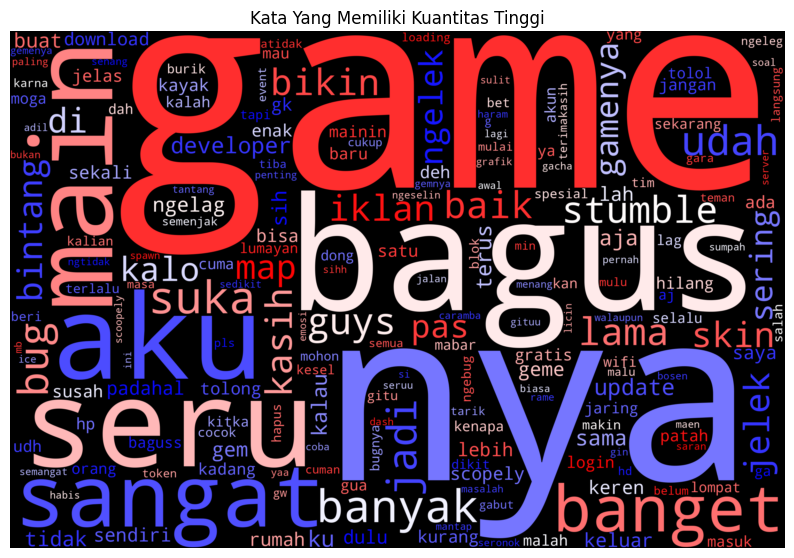

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


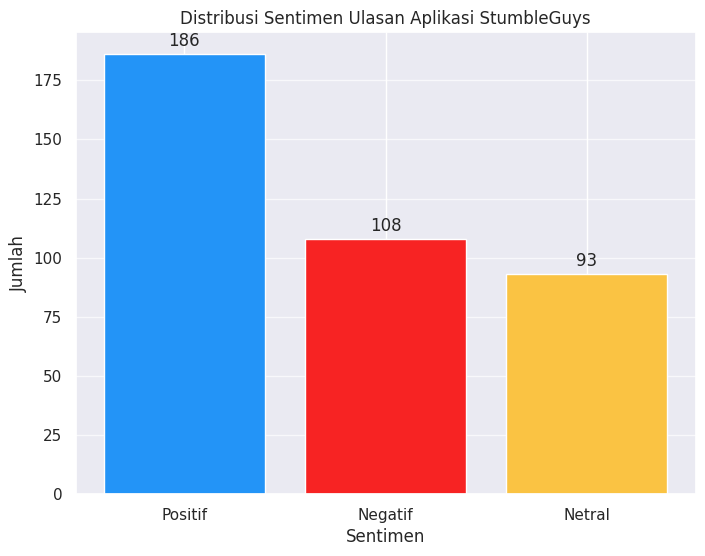

In [41]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi StumbleGuys")


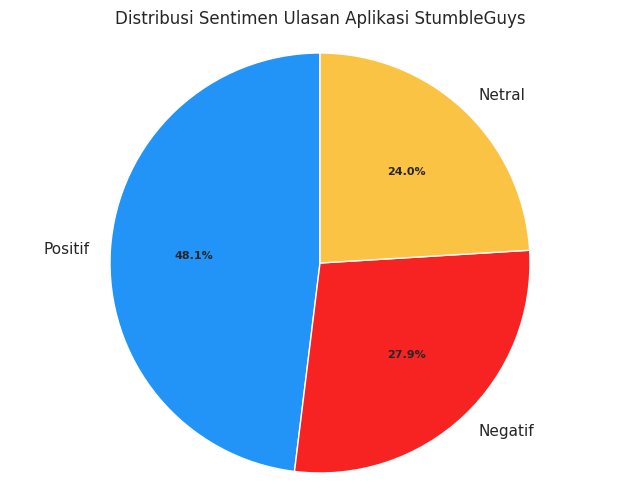

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi StumbleGuys")

In [43]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,game sangat bagus,The game is very good.,Positif
3,sangat baguss tpi kalo tambah denger suara sat...,It's really good. But if you hear the same voi...,Positif
7,sangat sesal game nya mas sama dulu banyak bug...,I'm so sorry. It's the same game. A lot of bug...,Negatif
10,seru sekali seperti hari aku main mulu dehhhh,It was fun. Like the day I played Mulu dehhhh.,Positif
11,loginnnya lama banget jir,The login is taking a long time.,Negatif
...,...,...,...
377,game nya bagus sih ngelek dikit bagus banget s...,It's a good game. It's a good game. It's prett...,Positif
380,terlalu doyan update luar game,too much outside-game updates,Positif
381,main bagus map oke masalah nya banyak bug cite...,It's a good map. It's a problem. There's a lot...,Positif
382,game nya lama seru min,The game's been fun for a long time.,Negatif


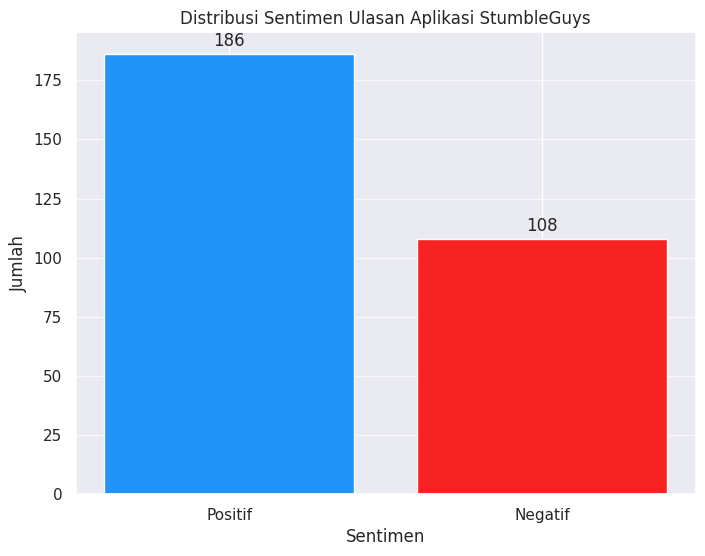

In [44]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi StumbleGuys")


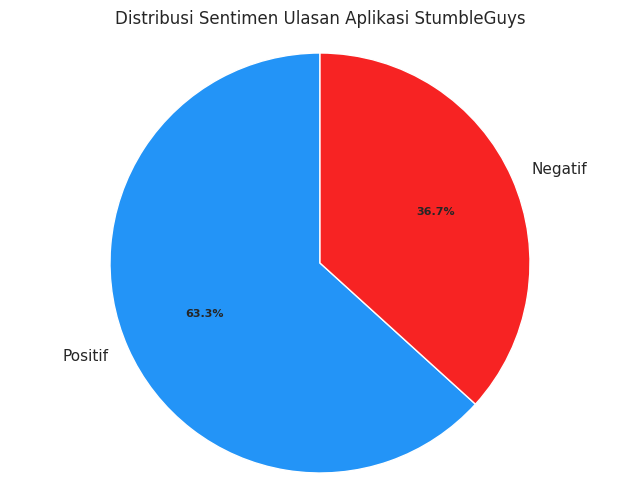

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi StumbleGuys")

In [46]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,game sangat bagus,The game is very good.,1
3,sangat baguss tpi kalo tambah denger suara sat...,It's really good. But if you hear the same voi...,1
7,sangat sesal game nya mas sama dulu banyak bug...,I'm so sorry. It's the same game. A lot of bug...,0
10,seru sekali seperti hari aku main mulu dehhhh,It was fun. Like the day I played Mulu dehhhh.,1
11,loginnnya lama banget jir,The login is taking a long time.,0
...,...,...,...
377,game nya bagus sih ngelek dikit bagus banget s...,It's a good game. It's a good game. It's prett...,1
380,terlalu doyan update luar game,too much outside-game updates,1
381,main bagus map oke masalah nya banyak bug cite...,It's a good map. It's a problem. There's a lot...,1
382,game nya lama seru min,The game's been fun for a long time.,0


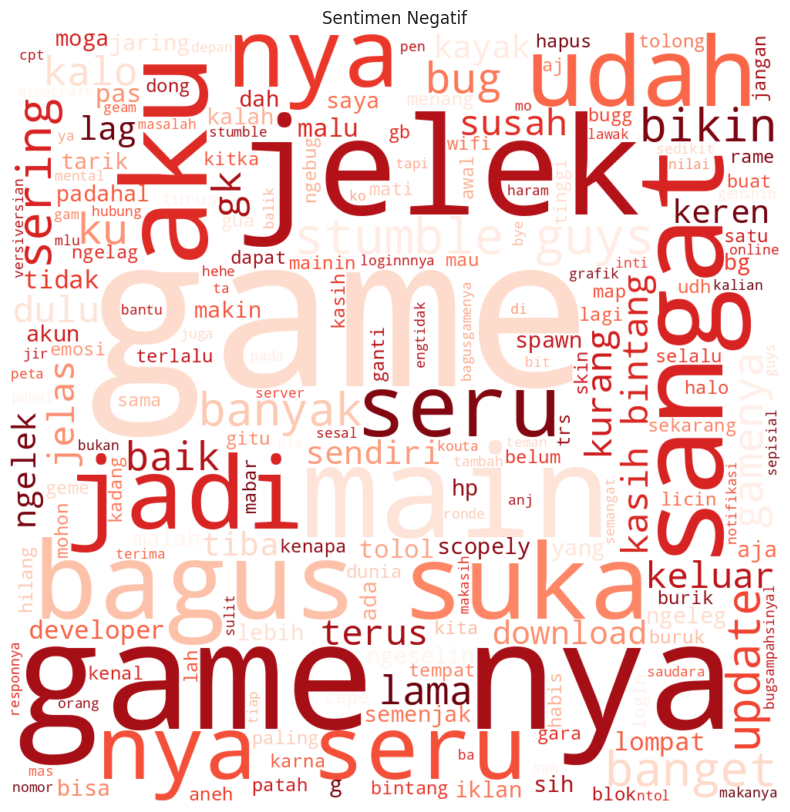

In [47]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

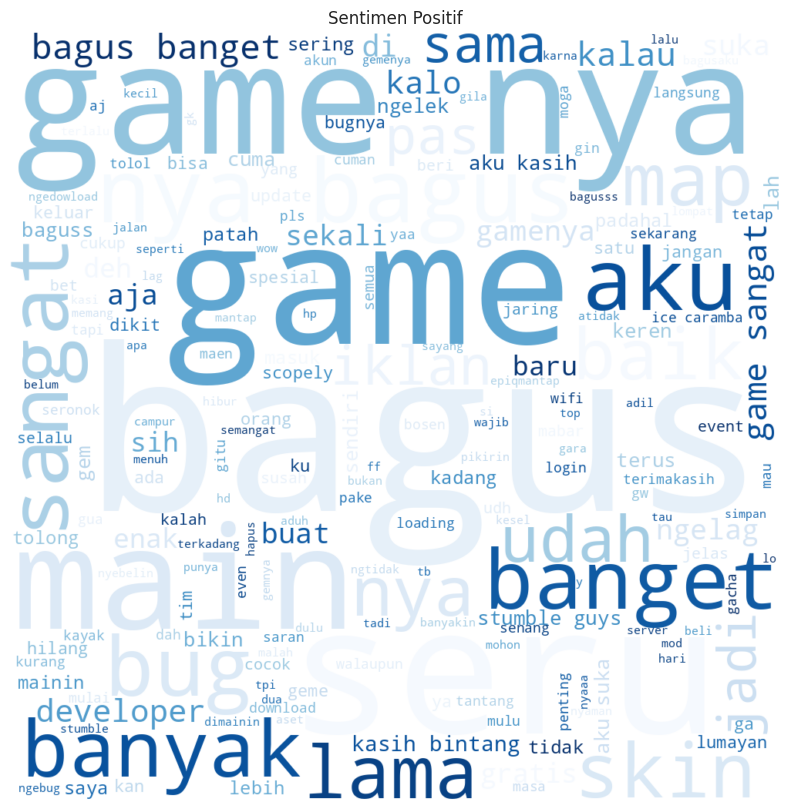

In [48]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [49]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    186
0    108
Name: count, dtype: int64

# **Data Preparation & Modeling**

In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [62]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [63]:
X_train

181    game seru sekarang kenang tolong banyakin skin...
310    enak rehat event tim blokdes terimakasih telah...
348    gamenya jelek banyak bug gk jalan kalo ngelek ...
126             minus iklan aja soal udh bagus mlh iklan
231                                      game seru bagus
                             ...                        
243    game tolol banyak iklan wifi nya tinggi gaje b...
93                                         gamenya jelek
139                                                  wow
352                                               sangar
135                         stumble guys game favorit ku
Name: content, Length: 176, dtype: object

In [64]:
# Menggunakan TfidfVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)


TfidfVectorizer()

In [65]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [66]:
X_train_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_vec, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.6779661016949152
Akurasi untuk c = 0.05: 0.7288135593220338
Akurasi untuk c = 0.25: 0.7457627118644068
Akurasi untuk c = 0.5: 0.7288135593220338
Akurasi untuk c = 0.75: 0.711864406779661
Akurasi untuk c = 1: 0.711864406779661


In [68]:
linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

In [69]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.711864406779661 


In [70]:
y_pred = svm.predict(X_test_vec)
print('Accuracy Of SVM Classfier On Test Set: {:.2f}' .format(svm.score(X_test_vec, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


Accuracy Of SVM Classfier On Test Set: 0.71
[[18 20]
 [14 66]]
              precision    recall  f1-score   support

           0       0.56      0.47      0.51        38
           1       0.77      0.82      0.80        80

    accuracy                           0.71       118
   macro avg       0.66      0.65      0.65       118
weighted avg       0.70      0.71      0.70       118



In [71]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[18 20]
 [14 66]]

True Positives (TP) =  18

True Negatives (TN) =  66

False Positives (FP) =  20

False Negatives (FN) =  14

Accuracy =  0.711864406779661


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

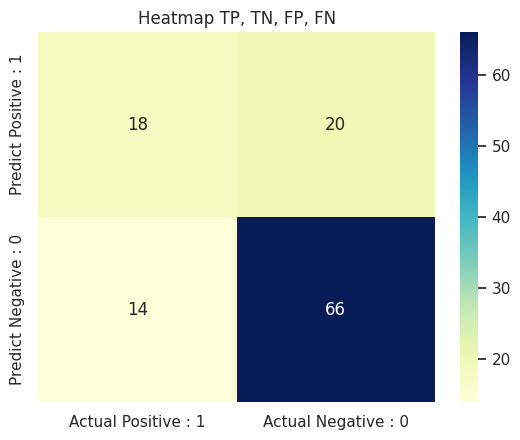

In [72]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive : 1', 'Actual Negative : 0'],
                                 index=['Predict Positive : 1', 'Predict Negative : 0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [73]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [74]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7119


In [75]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2881


# **Testing**


In [76]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : bagus banget
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 97.70%
Probabilitas: 97.6996857692371 %


In [77]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : jelek
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 98.90%
Probabilitas: 98.90071031027115 %
